In [1]:
import fastf1
session  =fastf1.get_session(2024,12,"Q")
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (153.91 MB) C:\Users\Asus\AppData\Local\Temp\fastf1
core           INFO 	Loading data for British Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '44', '4', '1', '81', '27', '55', '18', '23', '14', '16', '2', '22', '24', '3', '77', '20', '31', '11', '10']


C:\Users\Asus\AppData\Local\Temp\ipykernel_29332\1687140952.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic["GR"]['Cumulative_Time_Diff'] = dic["GR"]['Time_Diff'].cumsum()
C:\Users\Asus\AppData\Local\Temp\ipykernel_29332\1687140952.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dic["GR"]['Time_Diff_Millis'] = dic["GR"]['Time_Diff'].dt.microseconds // 1000 + dic["GR"]['Time_Diff'].dt.seconds * 1000
C:\Users\Asus\AppData\Local\Temp\ipykernel_29332\1687140952.py:26: SettingWithCopyWarning: 
A va

Text(0.5, 0, 'Time')

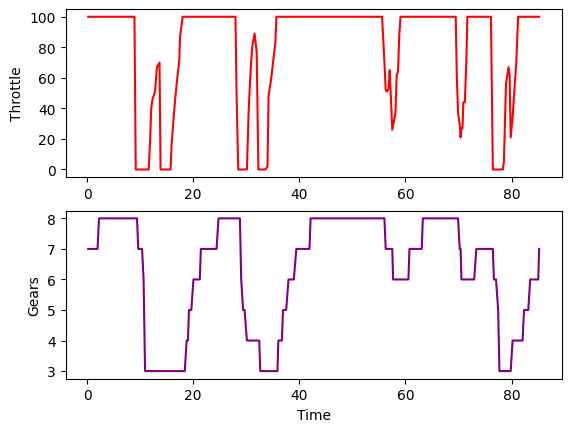

In [2]:
import pandas as pd
import fastf1
import matplotlib.pyplot as plt
%matplotlib inline
# session  =fastf1.get_session(2024,12,"Q")
# session.load()
dic = {}

df = session.car_data["63"]
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the time difference between consecutive rows
df['Time_Diff'] = df['Date'].diff()

# Shift the 'Time_Diff' column to align with the previous row
df['Time_Diff'] = df['Time_Diff'].shift(-1)



df[df['RPM']>0]

dic["GR"] = df[(df['Time'] >"0 days 01:21:35.888000")& (df["Time"]< "0 days 01:23:01.707000")]
dic["GR"]['Cumulative_Time_Diff'] = dic["GR"]['Time_Diff'].cumsum()

dic["GR"]['Time_Diff_Millis'] = dic["GR"]['Time_Diff'].dt.microseconds // 1000 + dic["GR"]['Time_Diff'].dt.seconds * 1000
dic["GR"]['Cumulative_Time_Diff_Millis'] = dic["GR"]['Time_Diff_Millis'].cumsum()/1000



fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(dic["GR"]["Cumulative_Time_Diff_Millis"],dic["GR"]["Throttle"],'r')
axes[0].set_ylabel("Throttle")
axes[1].plot(dic["GR"]["Cumulative_Time_Diff_Millis"],dic["GR"]["nGear"],'purple')
axes[1].set_ylabel("Gears")
axes[1].set_xlabel("Time")